In [1]:
using DataFrames
using Plots
using CategoricalArrays
using Random
using MLJBase: machine, transform
using Imbalance

include("./utils.jl")

plot_data

### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

num_rows = 10
num_features = 4
probs = [0.5, 0.2, 0.3]

X, y = generate_imbalanced_data(num_rows, num_features; probs, type="MatrixTable", rng=111)
Xm = Tables.matrix(X)

10×4 Matrix{Float64}:
 0.499468   0.151412  0.483445  0.108176
 0.748786   0.128202  0.937683  0.106755
 0.936033   0.766837  0.659124  0.532729
 0.479874   0.783647  0.834162  0.765871
 0.213247   0.57022   0.337138  0.218344
 0.590177   0.339184  0.79113   0.134209
 0.0865026  0.566936  0.315986  0.189019
 0.462185   0.793779  0.108564  0.783064
 0.108725   0.248588  0.832027  0.159806
 0.600787   0.734617  0.186145  0.699584

### 2. Apply SMOTE

In [3]:
mach = machine(SMOTE(k=10, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=rng))
Xover, yover = transform(mach, X, y)

┌ Warning: one of the classes has a single observation and will be ignored
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/smote.jl:94


((Column1 = [0.49946840445645435, 0.7487864696373514, 0.9360325107063399, 0.47987415455899196, 0.21324689992117873, 0.5901769187602144, 0.08650259757788747, 0.4621851433103745, 0.10872494798400512, 0.600786651803666, 0.49336051134213216, 0.5901769187602144, 0.21240415106136712, 0.31687544747171237, 0.2546813478302643, 0.5233221632443678], Column2 = [0.15141222029745194, 0.12820226059019335, 0.7668373839919138, 0.7836473923237626, 0.570220275548952, 0.3391840525854428, 0.5669362980271129, 0.7937786195026104, 0.24858764012986323, 0.7346174138893422, 0.6626731726656263, 0.3391840525854428, 0.3509958934527464, 0.5696471998006364, 0.4737165616606941, 0.6581025224507105], Column3 = [0.4834445257440343, 0.937683270816976, 0.6591240462427301, 0.8341622067264116, 0.3371383162671884, 0.791129869233753, 0.3159863882717422, 0.10856397191604983, 0.8320272884902893, 0.18614532546453, 0.4803222986364614, 0.791129869233753, 0.6959375934607098, 0.40598426385235564, 0.5332833209821244, 0.287825491888948

### 3. Plot the Results

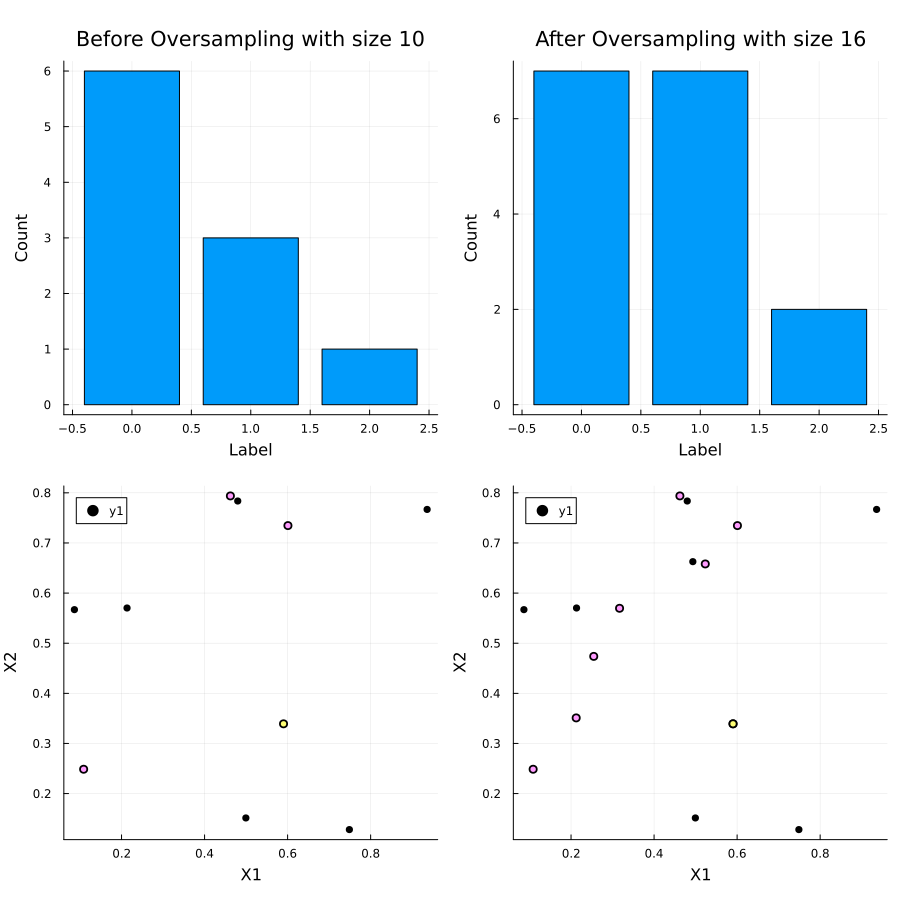

In [4]:
plot_data(y, yover, X, Xover)